<a href="https://colab.research.google.com/github/Cuong2812/KNN/blob/main/KNN_and_Perceptron_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Import**

In [105]:
import numpy as np
import pandas as pd

In [106]:
dataset = pd.read_csv('/content/Iris.csv')

In [107]:
dataset.shape

(150, 6)

In [108]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [109]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [110]:
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [111]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Visualization**

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

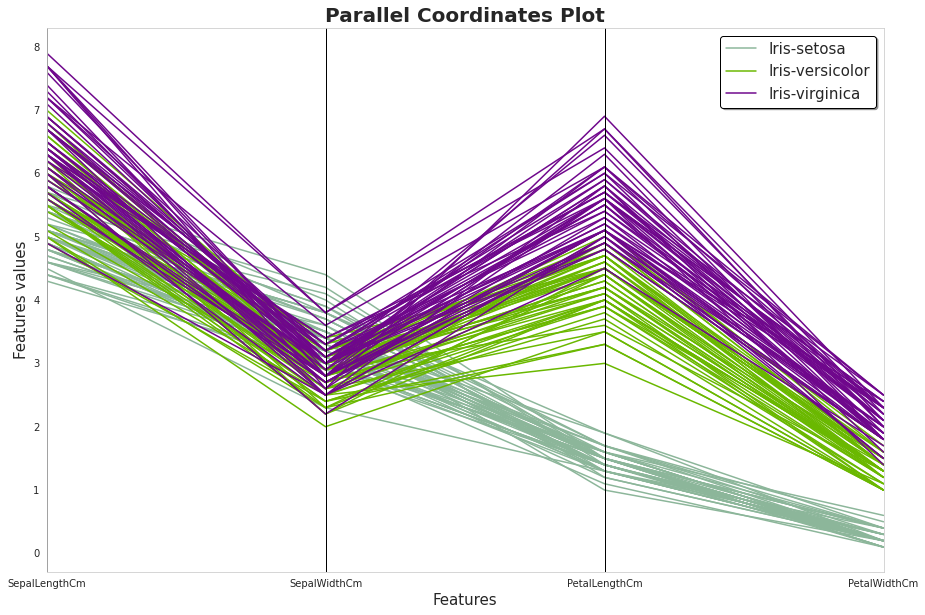

In [115]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop("Id", axis=1), "Species")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

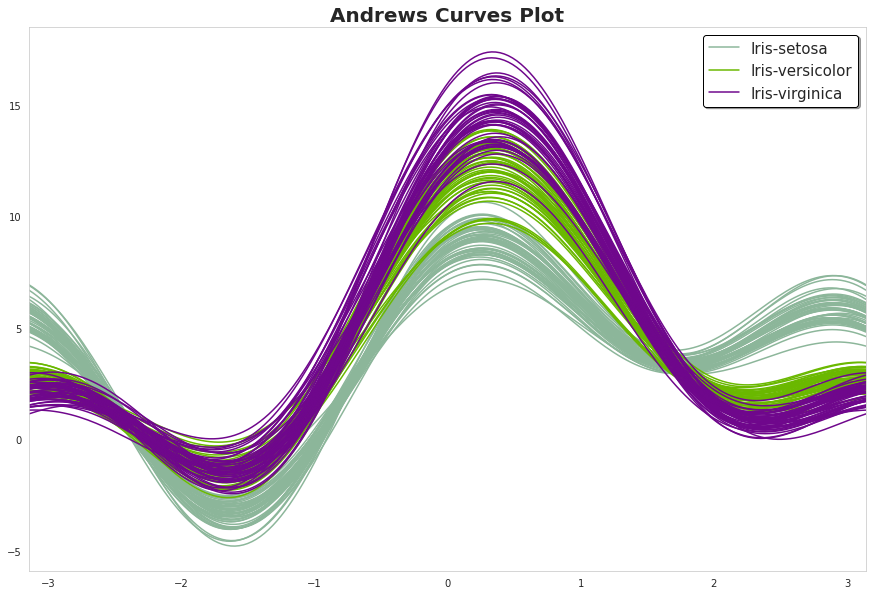

In [116]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(dataset.drop("Id", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

<Figure size 432x288 with 0 Axes>

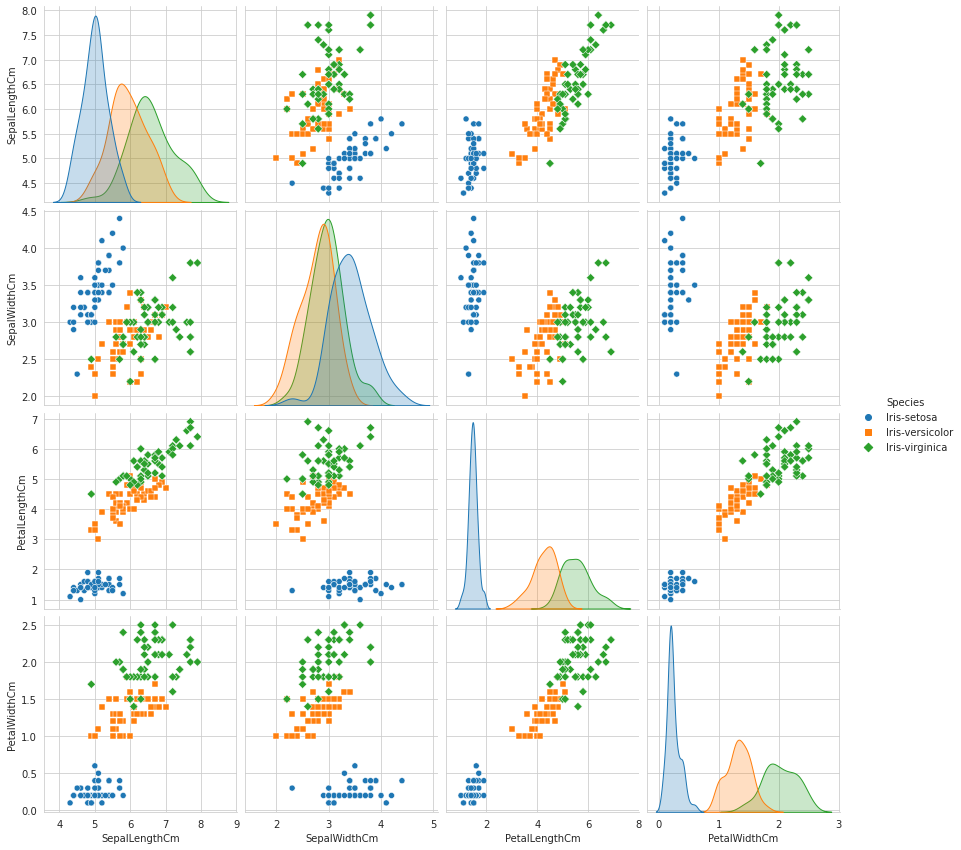

In [117]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()

# **KNN**

In [118]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# KNN with varied k values





k = 1

In [119]:
# Instantiate learning model (k = 1)
classifier_k1 = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier_k1.fit(X_train, y_train)

# Predicting the Test set results
y_pred_k1 = classifier_k1.predict(X_test)

k = 2

In [120]:
# Instantiate learning model (k = 2)
classifier_k2 = KNeighborsClassifier(n_neighbors=2)

# Fitting the model
classifier_k2.fit(X_train, y_train)

# Predicting the Test set results
y_pred_k2 = classifier_k2.predict(X_test)

k = 3

In [121]:
# Instantiate learning model (k = 3)
classifier_k3 = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier_k3.fit(X_train, y_train)

# Predicting the Test set results
y_pred_k3 = classifier_k3.predict(X_test)

k = 4

In [122]:
# Instantiate learning model (k = 4)
classifier_k4 = KNeighborsClassifier(n_neighbors=4)

# Fitting the model
classifier_k4.fit(X_train, y_train)

# Predicting the Test set results
y_pred_k4 = classifier_k4.predict(X_test)

Performances of varied K values

k = 1

In [123]:
cm = confusion_matrix(y_test, y_pred_k1)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [124]:
accuracy = accuracy_score(y_test, y_pred_k1)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


k = 2

In [125]:
cm = confusion_matrix(y_test, y_pred_k2)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [126]:
accuracy = accuracy_score(y_test, y_pred_k2)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


k = 3

In [127]:
cm = confusion_matrix(y_test, y_pred_k3)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [128]:
accuracy = accuracy_score(y_test, y_pred_k3)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


k = 4

In [129]:
cm = confusion_matrix(y_test, y_pred_k3)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [130]:
accuracy = accuracy_score(y_test, y_pred_k3)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


With k = 2 to 4 (4 features), the classification error remains consistant, meaning k = 2 first seems to be the optimal k value for the classification

# KNN with normalized inputs

In [131]:
from sklearn.preprocessing import StandardScaler

#stadardize data
X_scaled = StandardScaler().fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0)

In [132]:
# Fitting the model
classifier_k3.fit(X_train_scaled, y_train_scaled)

# Predicting the Test set results
y_pred_k3_scaled = classifier_k3.predict(X_test_scaled)

In [133]:
cm = confusion_matrix(y_test_scaled, y_pred_k3_scaled)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [134]:
accuracy = accuracy_score(y_test_scaled, y_pred_k3_scaled)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


The result is the same, indicating that the classification model is robust to non-standardized inputs

# KNN with PCA

In [135]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [136]:
# PCA is not robust to non-standardized inputs
pca = PCA(n_components=4)
pc_X = pca.fit_transform(X_scaled)
pc_columns = ['pc1','pc2','pc3','pc4']
print(pca.explained_variance_ratio_.sum())

0.9999999999999999


In [137]:
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


In [138]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pc_X, y, test_size = 0.2, random_state = 0)

# Fitting the model
classifier_k3.fit(X_train_pca, y_train_pca)

# Predicting the Test set results
y_pred_k3_pca = classifier_k3.predict(X_test_pca)

In [139]:
cm = confusion_matrix(y_test_pca, y_pred_k3_pca)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [140]:
accuracy = accuracy_score(y_test_pca, y_pred_k3_pca)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


The performance of the model after PCA does not not change. This is the result of the total percentage of variance explained by the principal components is so high (99%) that we can conclude that the dataset is very adequately sampled and PCA is unnessasary for the classification of this study.

# KNN with k value cross-validation

In [141]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

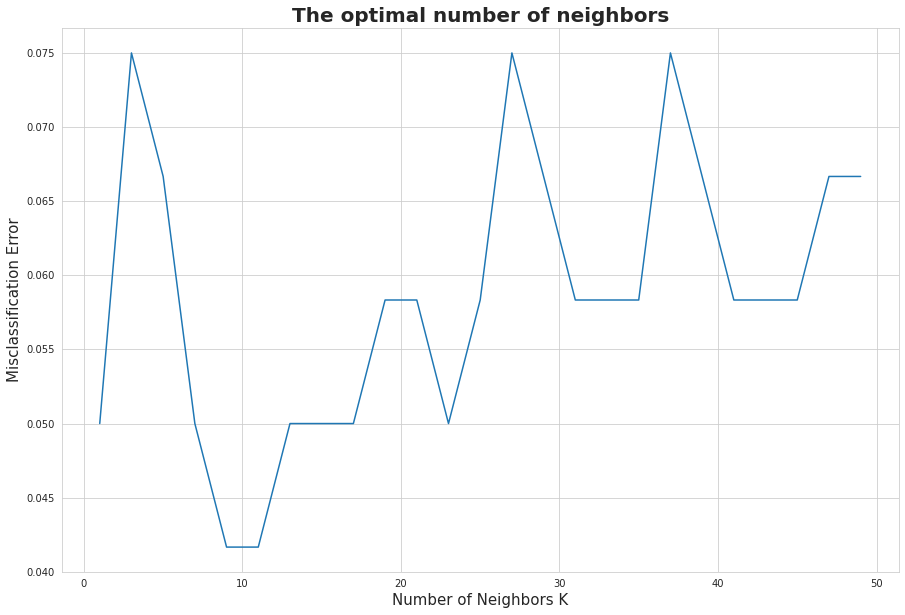

In [142]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [143]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


In [144]:
classifier_k9 = KNeighborsClassifier(n_neighbors=9)

# Fitting the model
classifier_k9.fit(X_train, y_train)

# Predicting the Test set results
y_pred_k9 = classifier_k9.predict(X_test)

In [145]:
cm = confusion_matrix(y_test, y_pred_k9)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [146]:
accuracy = accuracy_score(y_test, y_pred_k9)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


The performance indicates that the model is perfected at k = 9. I doubt it though.

# KNN with Leave-one-out Cross-validation

In [147]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

error = []
loocv = LeaveOneOut()
loocv.get_n_splits(X)
for train_index, test_index in loocv.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # print(X_train, X_test, y_train, y_test)

    # Loop over possible values of "n_neighbors"
    for i in range(1, 10):  
        classifier = KNeighborsClassifier(n_neighbors=i)  
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        error.append(np.mean(y_pred != y_test))
loocv

LeaveOneOut()

In [148]:
results = cross_val_score(classifier_k9, X_train, y_train, cv=loocv)
results

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

I honestly don't know

# **Perceptron Classifier**

In [149]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, eta0 = 0.1, tol = 1e-3, random_state = 1)
ppn.fit(X_train_scaled, y_train_scaled)
y_pred_ppn = ppn.predict(X_test_scaled)
print('The number of wrong classified sample :', (y_test_scaled != y_pred_ppn).sum())
print('The accuracy of Perceptron : %.2f' %((y_test_scaled == y_pred_ppn).sum() / len(y_pred_ppn)))


The number of wrong classified sample : 2
The accuracy of Perceptron : 0.93


In [150]:
print('The accuracy of Perceptron : %.2f' %(accuracy_score(y_test_scaled, y_pred_ppn)))

The accuracy of Perceptron : 0.93


# Visualizing Perceptron Classifier

In [151]:
from matplotlib.colors import ListedColormap

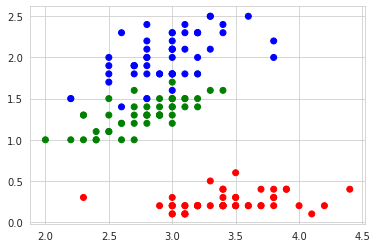

In [152]:
colors = dataset['Species'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=['red', 'blue', 'green'])
plt.scatter(dataset['SepalWidthCm'], dataset['PetalWidthCm'], c=colors)

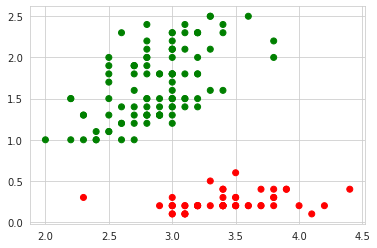

In [153]:
colors = dataset['Species'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=['red', 'green', 'green'])
plt.scatter(dataset['SepalWidthCm'], dataset['PetalWidthCm'], c=colors)

In [154]:
PC1 = pc_X[:,0]
PC2 = pc_X[:,1]

In [155]:
X_PC = pc_X[:, 0:1]

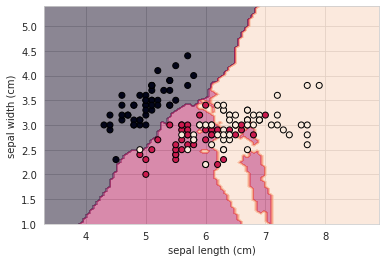

In [156]:
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
iris = load_iris()
X = iris.data[:, :2]

classifier_k9.fit(X_train, y_train)

# Predicting the Test set results
y_pred_k9 = classifier_k9.predict(X_test)

classifier = classifier_k9.fit(X_train, y_train).fit(X, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(
     classifier, X, response_method="predict",
     xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
     alpha=0.5,
)
disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")

plt.show()